# Atividade Principal - Pandas
### Marcos Monnerat (29775)

PRINCIPAL (1000XP)

    Escolher uma base de dados da sua preferência, através de sites como Kaggle, UCI, etc.
    Cada um dos requisitos abaixo deve vir acompanhado de uma pergunta. Por exemplo, "quantos meninos que tiraram nota acima de 5 existem na turma?";
    Utilizar as seguintes funções pelo menos uma vez:
        fillna ou dropna;
        apply;
        rename;
    Realizar manipulações aritméticas necessárias na base de dados (soma, multiplicação, divisão, etc.);
    Filtrar dados que sejam relevantes (filtros, query ou where);
    Criar duas novas colunas, que venham a partir de alguma estatística (mean, median, max, etc.);
    Utilizar o groupby, gerando alguma constatação estatística interessante;
    Utilizar o pd.qcut ou o pd.cut;

OBS.: O envio do trabalho não deve ser feito por aqui, mas sim através de uma PR para a main branch do repositório abaixo:

https://gitlab.com/lfernandotexbicalho/1016-projeto-final-pandas

EXTRA (200XP)

    Gerar um gráfico a partir de qualquer dataframe utilizado no programa (matplotlib);
    Exportar um dataframe para um CSV, desde que não seja igual ao original.

In [1]:
# Importando bibliotecas
import pandas as pd
from pandas import json_normalize
import json
import numpy as np
from statistics import mode

In [2]:
# Trazendo o dataset
df_bjcp = json.load(open('styleguide-2015.json', encoding='utf-8'))
categories = df_bjcp['styleguide']['class'][0]['category']
# pd.DataFrame(categories).head()
# drill down into subcategories and append the parent category as a field on each subcategory
all_categories = []
for category in categories:
    for sub_category in category['subcategory']:
        sub_category['parent'] = category
        all_categories.append(sub_category)
        
df_bjcp = json_normalize(all_categories)
df_bjcp.head(3)

id                  name  \
0  1A  American Light Lager   
1  1B        American Lager   
2  1C             Cream Ale   

                                          impression  \
0  Highly carbonated, very light-bodied, nearly f...   
1  A very pale, highly-carbonated, light-bodied, ...   
2  A clean, well-attenuated, flavorful American “...   

                                               aroma  \
0  Low to no malt aroma, although it can be perce...   
1  Low to no malt aroma, although it can be perce...   
2  Medium-low to low malt notes, with a sweet, co...   

                                          appearance  \
0  Very pale straw to pale yellow color. White, f...   
1  Very pale straw to medium yellow color. White,...   
2  Pale straw to moderate gold color, although us...   

                                              flavor  \
0  Relatively neutral palate with a crisp and dry...   
1  Relatively neutral palate with a crisp and dry...   
2  Low to medium-low hop bitterness. Low to moder...   

                                           mouthfeel  \
0  Very light (sometimes watery) body. Very highl...   
1  Low to medium-low body. Very highly carbonated...   
2  Generally light and crisp, although body can r...   

                                            comments  \
0  Designed to appeal to as broad a range of the ...   
1  Strong flavors are a fault. Often what non-cra...   
2  Pre-prohibition Cream Ales were slightly stron...   

                                             history  \
0  Coors briefly made a light lager in the early ...   
1  Although German immigrants had brewed traditio...   
2  A sparkling or present-use ale that existed in...   

                                         ingredients  ... examples.Dark  \
0  Two- or six-row barley with high percentage (u...  ...           NaN   
1  Two- or six-row barley with high percentage (u...  ...           NaN   
2  American ingredients most commonly used. A gra...  ...           NaN   

  examples.Pale examples.American examples.English entryinstructions.span  \
0           NaN               NaN              NaN                    NaN   
1           NaN               NaN              NaN                    NaN   
2           NaN               NaN              NaN                    NaN   

  stats.exceptions.ul.li stats.exceptions entryinstructions.span.class  \
0                    NaN              NaN                          NaN   
1                    NaN              NaN                          NaN   
2                    NaN              NaN                          NaN   

  entryinstructions.span.$t examples.  
0                       NaN       NaN  
1                       NaN       NaN  
2                       NaN       NaN  

[3 rows x 48 columns]

In [3]:
df_bjcp.columns

Index(['id', 'name', 'impression', 'aroma', 'appearance', 'flavor',
       'mouthfeel', 'comments', 'history', 'ingredients', 'comparison',
       'examples', 'tags', 'stats.og.flexible', 'stats.og.low',
       'stats.og.high', 'stats.fg.flexible', 'stats.fg.low', 'stats.fg.high',
       'stats.ibu.flexible', 'stats.ibu.low', 'stats.ibu.high',
       'stats.srm.flexible', 'stats.srm.low', 'stats.srm.high',
       'stats.abv.flexible', 'stats.abv.low', 'stats.abv.high', 'parent.id',
       'parent.revision.number', 'parent.revision.$t', 'parent.name',
       'parent.notes', 'parent.subcategory', 'entryinstructions', 'notes',
       'examples.Dark Versions', 'examples.Pale Versions', 'examples.Dark',
       'examples.Pale', 'examples.American', 'examples.English',
       'entryinstructions.span', 'stats.exceptions.ul.li', 'stats.exceptions',
       'entryinstructions.span.class', 'entryinstructions.span.$t',
       'examples.'],
      dtype='object')

In [4]:
# Renomeando as colunas do dataset
df_bjcp.rename(columns={'stats.og.flexible': 'og_flexible', 
                        'stats.og.low': 'og_low',
                        'stats.og.high': 'og_high',
                        'stats.fg.flexible': 'fg_flexible',
                        'stats.fg.low': 'fg_low',
                        'stats.fg.high': 'fg_high',
                        'stats.ibu.flexible': 'ibu_flexible',
                        'stats.ibu.low': 'ibu_low',
                        'stats.ibu.high': 'ibu_high',
                        'stats.srm.flexible': 'srm_flexible', 
                        'stats.srm.low': 'srm_low', 
                        'stats.srm.high': 'srm_high',
                        'stats.abv.flexible': 'abv_flexible', 
                        'stats.abv.low': 'abv_low', 
                        'stats.abv.high': 'abv_high', 
                        'parent.id': 'parent_id', 
                        'parent.revision.number': 'parent_revision_number', 
                        'parent.revision.$t': 'parent_revision_t', 
                        'parent.name': 'parent_name',
                        'parent.notes': 'parent_notes',
                        'parent.subcategory': 'parent_subcategory',
                        'examples.Dark Versions': 'examples_dark_versions', 
                        'examples.Pale Versions': 'examples_pale_versions', 
                        'examples.Dark': 'examples_dark',
                        'examples.Pale': 'examples_pale', 
                        'examples.American': 'examples_american', 
                        'examples.English': 'examples_english',
                        'entryinstructions.span': 'entryinstructions_span', 
                        'stats.exceptions.ul.li': 'exceptions_ul_li', 
                        'stats.exceptions': 'exceptions',
                        'entryinstructions.span.class': 'entryinstructions_span_class', 
                        'entryinstructions.span.$t': 'entryinstructions_span_t',
                        'examples.': 'examples_'}, inplace=True)

df_bjcp.columns

Index(['id', 'name', 'impression', 'aroma', 'appearance', 'flavor',
       'mouthfeel', 'comments', 'history', 'ingredients', 'comparison',
       'examples', 'tags', 'og_flexible', 'og_low', 'og_high', 'fg_flexible',
       'fg_low', 'fg_high', 'ibu_flexible', 'ibu_low', 'ibu_high',
       'srm_flexible', 'srm_low', 'srm_high', 'abv_flexible', 'abv_low',
       'abv_high', 'parent_id', 'parent_revision_number', 'parent_revision_t',
       'parent_name', 'parent_notes', 'parent_subcategory',
       'entryinstructions', 'notes', 'examples_dark_versions',
       'examples_pale_versions', 'examples_dark', 'examples_pale',
       'examples_american', 'examples_english', 'entryinstructions_span',
       'exceptions_ul_li', 'exceptions', 'entryinstructions_span_class',
       'entryinstructions_span_t', 'examples_'],
      dtype='object')

In [5]:
pd.option_context('display.max_columns', None)
df_bjcp.describe().T

count unique  \
id                             120    120   
name                           120    120   
impression                     119    118   
aroma                          120    118   
appearance                     120    116   
flavor                         120    117   
mouthfeel                      120    114   
comments                       119    117   
history                        105    104   
ingredients                    107    105   
comparison                     102    101   
examples                       107    107   
tags                           118    101   
og_flexible                    100      1   
og_low                         100     30   
og_high                        100     34   
fg_flexible                    100      1   
fg_low                         100     19   
fg_high                        100     18   
ibu_flexible                   100      1   
ibu_low                        100     19   
ibu_high                       100     24   
srm_flexible                   100      1   
srm_low                        100     23   
srm_high                       100     22   
abv_flexible                   100      1   
abv_low                        100     27   
abv_high                       100     38   
parent_id                      120     34   
parent_revision_number         120      1   
parent_revision_t              120      1   
parent_name                    120     34   
parent_notes                   120     34   
parent_subcategory             120     34   
entryinstructions               21     21   
notes                           17     16   
examples_dark_versions           1      1   
examples_pale_versions           1      1   
examples_dark                    1      1   
examples_pale                    1      1   
examples_american                1      1   
examples_english                 1      1   
entryinstructions_span           2      2   
exceptions_ul_li                 1      1   
exceptions                      18     10   
entryinstructions_span_class     1      1   
entryinstructions_span_t         1      1   
examples_                        1      1   

                                                                            top  \
id                                                                           1A   
name                                                       American Light Lager   
impression                    A malt-focused, generally caramelly beer with ...   
aroma                         Low to medium maltiness, often with flavors of...   
appearance                    Pale copper to very dark brown. Clear. Low to ...   
flavor                        Entirely malt-focused, with flavors ranging fr...   
mouthfeel                     Medium-light to medium body, with a smooth tex...   
comments                      Malt-focused ales that gain the vast majority ...   
history                                  See comments in category introduction.   
ingredients                   Originally used Scottish pale malt, grits or f...   
comparison                    Similar character to a Wee Heavy, but much sma...   
examples                      [Bud Light, Coors Light, Keystone Light, Miche...   
tags                                                           [specialty-beer]   
og_flexible                                                               false   
og_low                                                                    1.044   
og_high                                                                   1.060   
fg_flexible                                                               false   
fg_low                                                                    1.010   
fg_high                                                                   1.014   
ibu_flexible                                                              false   
ibu_low                                                                      20 

In [6]:
# Eliminando linhas sem informações quantitativas de og, fg, srm, ibu e abv
df_bjcp.dropna(subset=['og_flexible', 'og_low', 'og_high', 'fg_flexible',
       'fg_low', 'fg_high', 'ibu_flexible', 'ibu_low', 'ibu_high',
       'srm_flexible', 'srm_low', 'srm_high', 'abv_flexible', 'abv_low',
       'abv_high'], thresh=len(['og_flexible', 'og_low', 'og_high', 'fg_flexible',
       'fg_low', 'fg_high', 'ibu_flexible', 'ibu_low', 'ibu_high',
       'srm_flexible', 'srm_low', 'srm_high', 'abv_flexible', 'abv_low',
       'abv_high']), inplace=True)

In [7]:
df_bjcp.describe().T

count unique  \
id                             100    100   
name                           100    100   
impression                     100     99   
aroma                          100     98   
appearance                     100     96   
flavor                         100     97   
mouthfeel                      100     95   
comments                       100     98   
history                         97     96   
ingredients                     98     96   
comparison                      99     98   
examples                        95     95   
tags                           100     92   
og_flexible                    100      1   
og_low                         100     30   
og_high                        100     34   
fg_flexible                    100      1   
fg_low                         100     19   
fg_high                        100     18   
ibu_flexible                   100      1   
ibu_low                        100     19   
ibu_high                       100     24   
srm_flexible                   100      1   
srm_low                        100     23   
srm_high                       100     22   
abv_flexible                   100      1   
abv_low                        100     27   
abv_high                       100     38   
parent_id                      100     27   
parent_revision_number         100      1   
parent_revision_t              100      1   
parent_name                    100     27   
parent_notes                   100     27   
parent_subcategory             100     27   
entryinstructions                5      5   
notes                            2      2   
examples_dark_versions           1      1   
examples_pale_versions           1      1   
examples_dark                    1      1   
examples_pale                    1      1   
examples_american                1      1   
examples_english                 1      1   
entryinstructions_span           0      0   
exceptions_ul_li                 0      0   
exceptions                       0      0   
entryinstructions_span_class     0      0   
entryinstructions_span_t         0      0   
examples_                        0      0   

                                                                            top  \
id                                                                           1A   
name                                                       American Light Lager   
impression                    A malt-focused, generally caramelly beer with ...   
aroma                         Low to medium maltiness, often with flavors of...   
appearance                    Pale copper to very dark brown. Clear. Low to ...   
flavor                        Entirely malt-focused, with flavors ranging fr...   
mouthfeel                     Medium-light to medium body, with a smooth tex...   
comments                      Malt-focused ales that gain the vast majority ...   
history                                  See comments in category introduction.   
ingredients                   Originally used Scottish pale malt, grits or f...   
comparison                    Similar character to a Wee Heavy, but much sma...   
examples                      [Bud Light, Coors Light, Keystone Light, Miche...   
tags                          [high-strength, dark-color, top-fermented, nor...   
og_flexible                                                               false   
og_low                                                                    1.044   
og_high                                                                   1.060   
fg_flexible                                                               false   
fg_low                                                                    1.010   
fg_high                                                                   1.014   
ibu_flexible                                                              false   
ibu_low                                                                      20 

In [8]:
# Selecionando colunas com informação relevante para o estudo

df_bjcp = df_bjcp[['id', 'name', 'parent_name', 'impression', 'aroma', 'appearance', 'flavor', 'mouthfeel', 'comments', 'ingredients', 'comparison', 'examples', 
                   'tags', 'og_low', 'og_high', 'fg_low', 'fg_high', 'ibu_low', 'ibu_high', 'srm_low', 'srm_high', 'abv_low', 'abv_high', 
                   'notes', 'examples_dark_versions', 'examples_pale_versions', 'examples_dark', 'examples_pale', 'examples_american', 'examples_english']]

In [9]:
# Criando coluna com concatenação de outras colunas para unificar os exemplos de cervejas por estilo
def concat_colunas(row):
    examples_final = []
    lista = ['examples', 'examples_dark_versions',
       'examples_pale_versions', 'examples_dark', 'examples_pale',
       'examples_american', 'examples_english']
    for i in lista:
        if type(row[i]) != float:
            examples_final += row[i]
    return examples_final
    
df_bjcp['examples_final'] = df_bjcp.apply(lambda x: concat_colunas(x), axis=1)

In [10]:
# Eliminando as colunas de exemplos anteriores para manter apenas uma coluna com exemplos de cervejas de cada estilo
df_bjcp.drop(['examples', 'examples_dark_versions',
       'examples_pale_versions', 'examples_dark', 'examples_pale',
       'examples_american', 'examples_english'], axis='columns', inplace=True)

df_bjcp[['id', 'name', 'examples_final']].sample(25)

id                                     name  \
36              11C                            Strong Bitter   
22               7B                                  Altbier   
2                1C                                Cream Ale   
15               5B                                   Kölsch   
30               9C                            Baltic Porter   
71          21B-rye                   Specialty IPA: Rye IPA   
97          27-piwo         Historical Beer: Piwo Grodziskie   
14               5A                        German Leichtbier   
59              19A                       American Amber Ale   
4                2A                 International Pale Lager   
67      21B-belgian               Specialty IPA: Belgian IPA   
84              24B                         Belgian Pale Ale   
41              13B                        British Brown Ale   
39              12C                              English IPA   
99  27-pre18-porter  Historical Beer: Pre-Prohibition Porter   
17               5D                              German Pils   
72        21B-white                 Specialty IPA: White IPA   
85              24C                           Bière de Garde   
42              13C                           English Porter   
16               5C                 German Helles Exportbier   
75              22C                      American Barleywine   
53              17A                       British Strong Ale   
12               4B                                 Festbier   
7                3A                         Czech Pale Lager   
40              13A                                Dark Mild   

                                       examples_final  
36  [Bass Ale, Highland Orkney Blast, Samuel Smith...  
22  [Bolten Alt, Diebels Alt, Füchschen Alt, Origi...  
2   [Genesee Cream Ale, Liebotschaner Cream Ale, L...  
15  [Früh Kölsch, Gaffel Kölsch, Mühlen Kölsch, Re...  
30  [Aldaris Porteris, Baltika #6 Porter, Devils B...  
71  [Arcadia Sky High Rye, Bear Republic Hop Rod R...  
97                                                 []  
14  [Beck’s Light, Bitburger Light, Mahr’s Leicht,...  
59  [Deschutes Cinder Cone Red, Full Sail Amber, K...  
4   [Asahi Super Dry, Birra Moretti, Corona Extra,...  
67  [Brewery Vivant Triomphe, Houblon Chouffe, Epi...  
84  [De Koninck, De Ryck Special, Palm Dobble, Pal...  
41  [Maxim Double Maxim, Newcastle Brown Ale, Rigg...  
39  [Freeminer Trafalgar IPA, Fuller's Bengal Lanc...  
99               [Stegmaier Porter, Yuengling Porter]  
17  [König Pilsener, Left Hand Polestar Pils, Paul...  
72  [Blue Point White IPA, Deschutes Chainbreaker ...  
85  [Ch'Ti (brown and blond), Jenlain (amber and b...  
42  [Burton Bridge Burton Porter, Fuller's London ...  
16  [DAB Original, Dortmunder Kronen, Dortmunder U...  
75  [Avery Hog Heaven Barleywine, Anchor Old Fogho...  
53  [Fuller’s 1845, Harvey’s Elizabethan Ale, J.W....  
12  [Augustiner Oktoberfest, Hacker-Pschorr Superi...  
7   [Březňák Světlé výčepní pivo, Notch Session Pi...  
40  [Banks's Mild, Cain's Dark Mild, Highgate Dark...

In [11]:
# Criando colunas com range e médias para OG, FG, SRM, IBU e ABV

lista = ['og_', 'fg_', 'ibu_', 'srm_', 'abv_']

for i in lista:
    df_bjcp[i+'low'] = df_bjcp[i+'low'].astype(float)
    df_bjcp[i+'high'] = df_bjcp[i+'high'].astype(float)
    df_bjcp[i+'range'] = df_bjcp[i+'high'] - df_bjcp[i+'low']
    df_bjcp[i+'mean'] = np.mean([df_bjcp[i+'high'], df_bjcp[i+'low']], axis=0)

df_bjcp[['name', 'og_range', 'og_mean', 'fg_range', 'fg_mean', 'ibu_low', 'ibu_high', 'ibu_range', 'ibu_mean', 'srm_range', 'srm_mean', 'abv_range', 'abv_mean']].sample(3)

name  og_range  og_mean  fg_range  fg_mean  ibu_low  \
0   American Light Lager     0.012   1.0340     0.010    1.003      8.0   
87                Saison     0.017   1.0565     0.006    1.005     20.0   
32     Dunkles Weissbier     0.012   1.0500     0.004    1.012     10.0   

    ibu_high  ibu_range  ibu_mean  srm_range  srm_mean  abv_range  abv_mean  
0       12.0        4.0      10.0        1.0       2.5        1.4      3.50  
87      35.0       15.0      27.5        9.0       9.5        1.5      4.25  
32      18.0        8.0      14.0        9.0      18.5        1.3      4.95

In [12]:
# Filtrando dados para identificar estilos de cerveja a partir do nível alcóolico

df_bjcp.query('abv_high > 10')[['name', 'flavor', 'og_mean', 'fg_mean', 'ibu_mean', 'srm_mean', 'abv_low', 'abv_high', 'abv_mean', 'examples_final']]

name  \
29                     Eisbock   
56          English Barleywine   
64              Imperial Stout   
75         American Barleywine   
76                   Wheatwine   
88   Belgian Golden Strong Ale   
92     Belgian Dark Strong Ale   
101     Historical Beer: Sahti   

                                                flavor  og_mean  fg_mean  \
29   Rich, sweet malt balanced by a significant alc...   1.0990   1.0275   
56   Strong, intense, complex, multi-layered malt f...   1.1000   1.0240   
64   Rich, deep, complex and frequently quite inten...   1.0950   1.0240   
75   Strong, rich malt flavor with a noticeable hop...   1.1000   1.0230   
76   Moderate to moderately-high wheaty malt flavor...   1.1000   1.0230   
88   Marriage of fruity, spicy and alcohol flavors ...   1.0825   1.0105   
92   Similar to aroma (same malt, ester, phenol, al...   1.0925   1.0170   
101  Strong banana and moderate to moderately-high ...   1.0980   1.0180   

     ibu_mean  srm_mean  abv_low  abv_high  abv_mean  \
29       30.0      24.0      9.0      14.0      11.5   
56       52.5      15.0      8.0      12.0      10.0   
64       70.0      35.0      8.0      12.0      10.0   
75       75.0      14.5      8.0      12.0      10.0   
76       45.0      11.5      8.0      12.0      10.0   
88       28.5       4.5      7.5      10.5       9.0   
92       27.5      17.0      8.0      12.0      10.0   
101      11.0      13.0      7.0      11.0       9.0   

                                        examples_final  
29                                [Kulmbacher Eisbock]  
56   [Adnams Tally-Ho, Burton Bridge Thomas Sykes O...  
64   [Bell’s Expedition Stout, Cigar City Marshal Z...  
75   [Avery Hog Heaven Barleywine, Anchor Old Fogho...  
76   [Rubicon Winter Wheat Wine, Two Brothers Bare ...  
88   [Brigand, Delirium Tremens, Dulle Teve, Duvel,...  
92   [Achel Extra Brune, Boulevard The Sixth Glass,...  
101  [Now made year-round by several breweries in F...

In [22]:
# Criando coluna categorizando o nível de amargor (bitterness) da cerveja a partir do IBU

bins = [0, 20, 35, 55, 120]
df_bjcp['bitterness'] = pd.cut(df_bjcp['ibu_mean'], bins=bins, labels=['leve', 'médio', 'alto', 'extremo'])
df_bjcp[['name', 'ibu_low', 'ibu_mean', 'ibu_high', 'ibu_range', 'bitterness']].sample(5)

name  ibu_low  ibu_mean  ibu_high  ibu_range bitterness
52  Foreign Extra Stout     50.0      60.0      70.0       20.0    extremo
22              Altbier     25.0      37.5      50.0       25.0       alto
80               Lambic      0.0       5.0      10.0       10.0       leve
12             Festbier     18.0      21.5      25.0        7.0      médio
18               Märzen     18.0      21.0      24.0        6.0      médio

In [39]:
# Calculando o teor alcólico (abv) por nível de amargor (bitterness)

df_bjcp[['bitterness', 'abv_mean']].groupby('bitterness').agg(abv_min=('abv_mean', min), 
                                                              abv_max=('abv_mean', max), 
                                                              abv_medio=('abv_mean', np.mean), 
                                                              abv_mode=('abv_mean', mode), 
                                                              abv_median=('abv_mean', np.median)).reset_index()

bitterness  abv_min  abv_max  abv_medio  abv_mode  abv_median
0       leve     2.85      9.0   4.923913      4.95        4.95
1      médio     2.90     11.5   5.652941      5.10        5.10
2       alto     4.90     10.0   6.447222      6.50        6.25
3    extremo     6.75     10.0   8.237500     10.00        8.00

<Axes: xlabel='bitterness'>

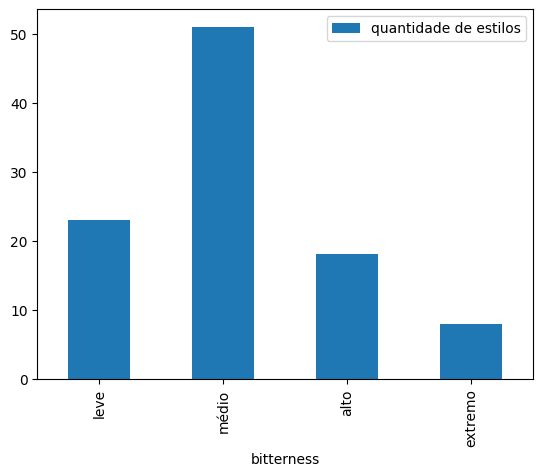

In [58]:
# Gerando gráfico de quantidade de cervejas por nível de amargor

df_bitterness = pd.DataFrame(df_bjcp.groupby('bitterness').count()['id']).reset_index().rename(columns={'id': 'quantidade de estilos'})
df_bitterness.plot.bar(x='bitterness')

In [59]:
# Exportando o dataset para CSV

df_bjcp.to_csv('estilos_de_cerveja_bjcp_2015.csv', sep=';', decimal=',', index=False)